# **Creating the Models**

In [2]:
tmp = "~/tmp"

In [3]:
width = 300
height = 300
channels = 3

## **The CNN**

In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(width, height, channels)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [5]:
# !gdown --id 1tJVQE_zckjnA5AtOujyXLXGQmxASjUzO
# !mv Weights.zip /Users/elig/tmp/Weights.zip
# !unzip -o /Users/elig/tmp/Weights.zip -d ~/tmp/
weights_dir = f'/Users/elig/tmp/Weights'

## **Creating a Copy for each Class**

In [6]:
classes = ['Pliers', 'Gun', 'Knife', 'Wrench', 'Scissors']

In [7]:
models_dict = dict()
for class_name in classes:
  models_dict[class_name] = tf.keras.models.clone_model(model)
  models_dict[class_name].load_weights(f'{weights_dir}/{class_name}.h5')

## **Loading Images**

In [8]:
# !gdown --id 1dYVzzSTW0KfyqqG6KU-nPAS_iZi21vpE
# !mv test_images.zip ~/tmp/test_images.zip 
# !unzip -o ~/tmp/test_images.zip -d ~/tmp/

In [9]:
test_images_dir = '~/tmp/test_images'

In [10]:
from keras.utils.image_utils import img_to_array, load_img, array_to_img

## **Test a Single Image**

1/1 [==============================] - 0s 17ms/step
Pliers: [[0.]]
1/1 [==============================] - 0s 16ms/step
Gun: [[1.]]
1/1 [==============================] - 0s 16ms/step
Knife: [[0.]]
1/1 [==============================] - 0s 16ms/step
Wrench: [[1.]]
1/1 [==============================] - 0s 17ms/step
Scissors: [[0.]]
['Gun', 'Wrench']


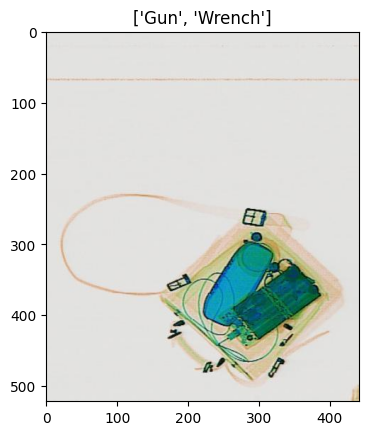

In [60]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt

test_image = '/Users/elig/tmp/test_images/No_Weapon/N0235992.jpg'
# N0235992 wrench
# N0028328 gun wrench knife

# test_image = "https://eli-did-assets.s3.amazonaws.com/dataset/JPEGImage/N1040644.jpg"

predicted_classes = []
for class_name in models_dict.keys():
  #model.load_weights(f'{weights_dir}/{class_name}.h5')
  test = load_img(test_image, target_size=(300, 300))
  test = np.expand_dims(test, axis=0)
  prediction = models_dict[class_name].predict(test)
  print(f'{class_name}: {prediction}')
  if prediction >= 0.5:
    predicted_classes.append(class_name)
if len(predicted_classes) == 0:
  predicted_classes.append('No weapon')
print(predicted_classes)
img = mpimg.imread(test_image)
imgplot = plt.imshow(img)
plt.title(f'{predicted_classes}')
plt.show()

1/1 [==============================] - 0s 18ms/step
Pliers: [[0.]]
1/1 [==============================] - 0s 17ms/step
Gun: [[1.]]
1/1 [==============================] - 0s 17ms/step
Knife: [[1.]]
1/1 [==============================] - 0s 17ms/step
Wrench: [[1.]]
1/1 [==============================] - 0s 18ms/step
Scissors: [[0.]]
['Gun', 'Knife', 'Wrench']


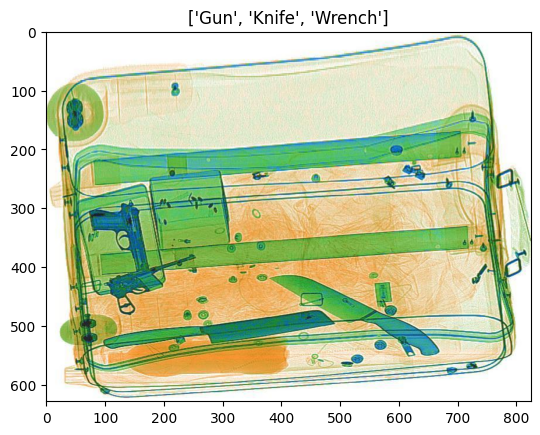

In [33]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from urllib import request
from PIL import Image
from io import BytesIO


s3_url = "https://eli-did-assets.s3.amazonaws.com/dataset/JPEGImage"
image_id = "P02483"
source_url = f'{s3_url}/{image_id}.jpg'

# test_image = '/Users/elig/tmp/test_images/No_Weapon/N1040644.jpg'
# test_image = '~/tmp/N1040644.jpg'
predicted_classes = []

bytes = BytesIO(request.urlopen(source_url).read())
test = load_img(bytes, target_size=(300, 300))
test = np.expand_dims(test, axis=0)
for class_name in models_dict.keys():
  
  model.load_weights(f'{weights_dir}/{class_name}.h5')
  # np.array(Image.open(request.urlopen(url)))
  
  prediction = models_dict[class_name].predict(test)
  print(f'{class_name}: {prediction}')
  if prediction >= 0.5:
    predicted_classes.append(class_name)
if len(predicted_classes) == 0:
  predicted_classes.append('No weapon')
print(predicted_classes)

imgplot = plt.imshow(Image.open(bytes))
plt.title(f'{predicted_classes}')
plt.show()



## **Create Good Images Test Set**

In [ ]:
from google.colab import drive
drive.mount('/tmp/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.image_utils import img_to_array, load_img, array_to_img

In [ ]:
def predict_on_image(test_image):
  predicted_classes = []
  for class_name in models_dict.keys():
    test = load_img(test_image, target_size=(300, 300))
    test = np.expand_dims(test, axis=0)
    prediction = models_dict[class_name].predict(test)
    if prediction >= 0.5:
      predicted_classes.append(class_name)
  if len(predicted_classes) == 0:
    predicted_classes.append('No_Weapon')
  return predicted_classes


In [ ]:
target_dir = '~/tmp/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2'
source_dir = '~/tmp/drive/MyDrive/Data Science Project/Dataset_Images-New/Test_Images'

In [ ]:
import os
if not os.path.isdir(target_dir):
  os.mkdir(target_dir)

In [ ]:
import os
import shutil
for dir_name in os.listdir(source_dir):
  names = dir_name.split('_')
  if '' in names: names.remove('')
  if dir_name == 'No_Weapon':
    names = ['No_Weapon']
  dest_images_dir = f'{target_dir}/{dir_name}'
  source_images_dir = f'{source_dir}/{dir_name}'
  if not os.path.isdir(dest_images_dir):
    os.mkdir(dest_images_dir)
    print(f'{dest_images_dir}- creates')
  else:
    print(f'{dest_images_dir}- exists')
    continue
  for img in os.listdir(source_images_dir):
    predictions = predict_on_image(f'{source_images_dir}/{img}')
    if len(predictions) != len(names):
      continue
    good = True
    for name in names:
      if name not in predictions:
        good = False
        break
    if good:
      shutil.copyfile(f'{source_images_dir}/{img}', f'{dest_images_dir}/{img}')
  if len(os.listdir(dest_images_dir)) == 0:
    shutil.rmtree(dest_images_dir)




/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Wrench- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Knife_Wrench_Pliers- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Knife- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Knife_Wrench- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Pliers- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Wrench_Pliers- exists
/content/drive/MyDrive/Data Science Project/Final_Test_Images/Good_Images2/_Gun_Knife_Wrench_Scissors- creates
1/1 [==============================] - 0s 216ms/step


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 63ms/step
